# Case Study: Kids First

The Kids First Data Resource Center [https://doi.org/10.1093/neuonc/noaa222.200] tracks samples from pediatric research, including childhood cancers and structural birth defects. A single study with 1765 patients, 2281 specimens, 664 Observations and 38394 DocumentReferences are included.  The DocumentReference url field contains DRS url values.


In [1]:
!ls -l kids_first/SD_DYPMEHHF


total 63432
-rw-rw-r-- 1 jupyter users 60113819 Jun 27 19:41 DocumentReference.ndjson
-rw-rw-r-- 1 jupyter users   766558 Jun 27 19:41 Observation.ndjson
-rw-rw-r-- 1 jupyter users  1164023 Jun 27 19:41 Patient.ndjson
-rw-rw-r-- 1 jupyter users      971 Jun 27 19:41 ResearchStudy.ndjson
-rw-rw-r-- 1 jupyter users  1037820 Jun 27 19:41 ResearchSubject.ndjson
-rw-rw-r-- 1 jupyter users  1853132 Jun 27 19:41 Specimen.ndjson


In [2]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [3]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide
 

In [4]:
from glob import glob
kf_file_paths = glob('./kids_first/SD_DYPMEHHF/*.ndjson')

In [5]:
graph = load_graph('kf', kf_file_paths, expected_resource_count=44870, check_edges=True)
'loaded'

2022-06-28 16:49:14,590 graph.py WARNING  No destination principalInvestigator PractitionerRole/96500 from ResearchStudy/100031


'loaded'

### Draw a summary graph

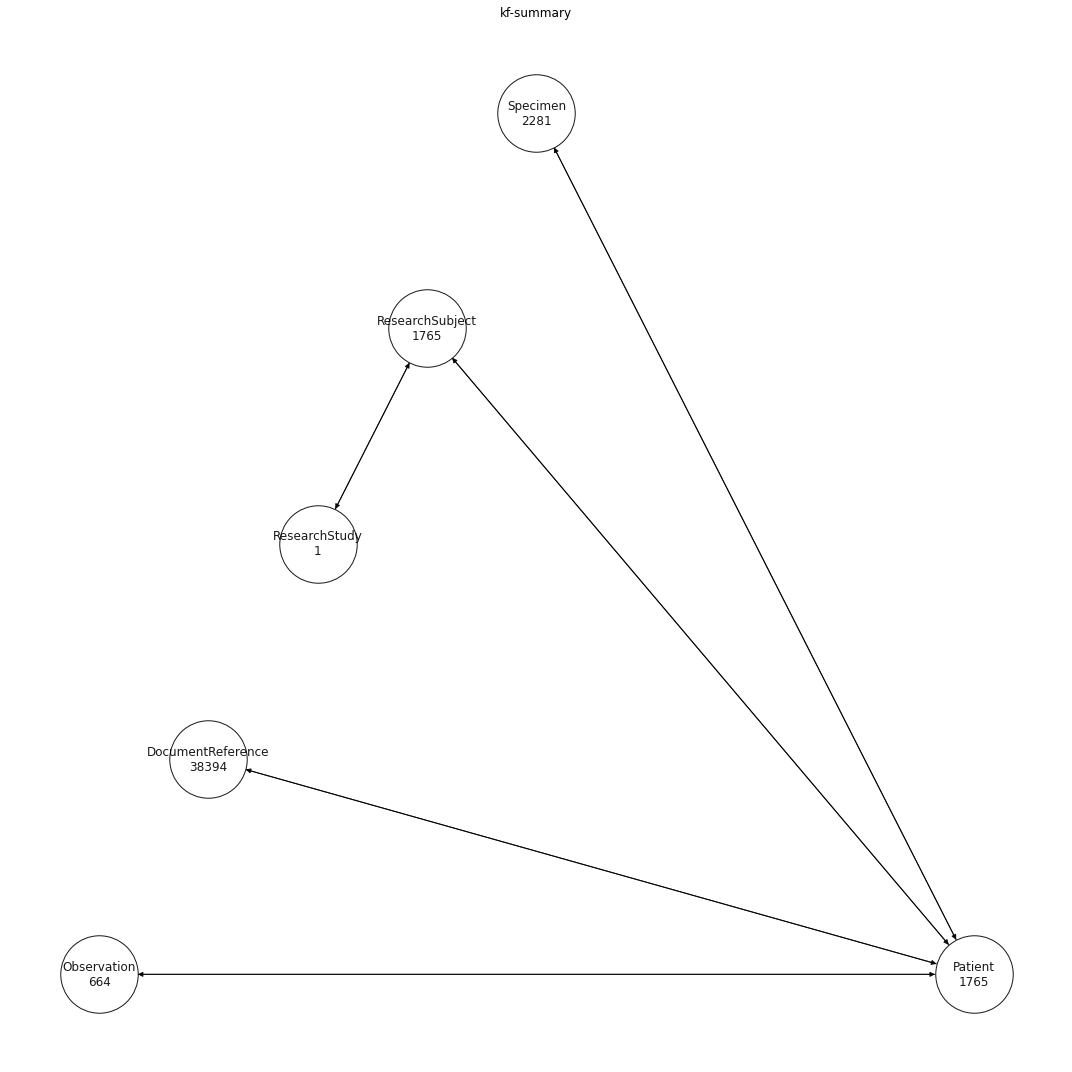

In [6]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'kf-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [7]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 1765, "should have 1765 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [8]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile_0,meta_tag_0_code,extension_0_extension_0_url,extension_0_extension_0_valueString,extension_0_extension_1_url,extension_0_extension_1_valueCoding_system,...,extension_1_extension_1_valueCoding_code,extension_1_extension_1_valueCoding_display,extension_1_url,identifier_0_value,identifier_1_system,identifier_1_value,identifier_2_system,identifier_2_value,gender,resourceType
0,96506,2,2021-11-16T09:46:28.562+00:00,#av8jlyuHYC7yee4G,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,Asian,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,2186-5,Not Hispanic or Latino,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PATWED03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_K59VNJ70,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_K59VNJ70,male,Patient
1,96509,2,2021-11-16T09:46:28.525+00:00,#crBEbGrmJvDslgDs,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PATWEJ13,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_Q3J9BZMY,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_Q3J9BZMY,female,Patient
2,96514,2,2021-11-16T09:46:28.695+00:00,#4QEw4BGyZYUAGRkF,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PAUCNL13,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_FYFTZSAV,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_FYFTZSAV,female,Patient
3,96501,2,2021-11-16T09:46:28.693+00:00,#sdMvR8aWIe6xpieh,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,2186-5,Not Hispanic or Latino,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PATGLU03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_M5EFHVEJ,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_M5EFHVEJ,male,Patient
4,96541,2,2021-11-16T09:46:28.825+00:00,#Oo8qYyBuXg6tPoA3,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,Reported Unknown,ombCategory,http://terminology.hl7.org/CodeSystem/v3-NullF...,...,NaN,NaN,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PAULBY03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_BQCKFXJJ,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_BQCKFXJJ,female,Patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,98227,2,2021-11-16T09:47:16.407+00:00,#aMK7nbGIZIkJ2utz,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PATEEC06,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_R5B7PHAC,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_R5B7PHAC,male,Patient
1761,98239,2,2021-11-16T09:47:16.590+00:00,#qZwK6ku8QYTGCIuz,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PATPJD06,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_3JZ3PVZG,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_3JZ3PVZG,male,Patient
1762,98250,2,2021-11-16T09:47:16.753+00:00,#9AoK2Y7lCw7Ps9yX,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,GMKF-30-PASHJZ13,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_AWWATPEN,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_AWWATPEN,female,Patient
1763,98262,2,2021-11-16T09:47:16.965+00:00,#PHlkCweNxB9i2tjF,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,text,Black or African American,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,2186-5,Not Hispanic or Latino,http://hl7.org/fhir/us/core/StructureDefinitio...,GMKF-30-PASTVV03,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_77DSBXEM,urn:kids-first:unique-string,Patient-SD_DYPMEHHF-PT_77DSBXEM,male,Patient


### Show simplified details

> 1/3 the number of columns

In [9]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] ).fillna('')

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile,meta_tag_,extension_us-core-race,extension_us-core-ethnicity,identifier_,identifier_https://kf-api-dataservice.kidsfirstdrc.org/participants/,identifier_urn:kids-first:unique-string,gender
0,96506,2,2021-11-16T09:46:28.562000+00:00,#av8jlyuHYC7yee4G,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,Asian|2028-9,Not Hispanic or Latino|2186-5,GMKF-30-PATWED03,PT_K59VNJ70,Patient-SD_DYPMEHHF-PT_K59VNJ70,male
1,96509,2,2021-11-16T09:46:28.525000+00:00,#crBEbGrmJvDslgDs,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,,,GMKF-30-PATWEJ13,PT_Q3J9BZMY,Patient-SD_DYPMEHHF-PT_Q3J9BZMY,female
2,96514,2,2021-11-16T09:46:28.695000+00:00,#4QEw4BGyZYUAGRkF,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,,,GMKF-30-PAUCNL13,PT_FYFTZSAV,Patient-SD_DYPMEHHF-PT_FYFTZSAV,female
3,96501,2,2021-11-16T09:46:28.693000+00:00,#sdMvR8aWIe6xpieh,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,White|2106-3,Not Hispanic or Latino|2186-5,GMKF-30-PATGLU03,PT_M5EFHVEJ,Patient-SD_DYPMEHHF-PT_M5EFHVEJ,male
4,96541,2,2021-11-16T09:46:28.825000+00:00,#Oo8qYyBuXg6tPoA3,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,Reported Unknown|UNK,Reported Unknown,GMKF-30-PAULBY03,PT_BQCKFXJJ,Patient-SD_DYPMEHHF-PT_BQCKFXJJ,female
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,98227,2,2021-11-16T09:47:16.407000+00:00,#aMK7nbGIZIkJ2utz,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,,,GMKF-30-PATEEC06,PT_R5B7PHAC,Patient-SD_DYPMEHHF-PT_R5B7PHAC,male
1761,98239,2,2021-11-16T09:47:16.590000+00:00,#qZwK6ku8QYTGCIuz,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,,,GMKF-30-PATPJD06,PT_3JZ3PVZG,Patient-SD_DYPMEHHF-PT_3JZ3PVZG,male
1762,98250,2,2021-11-16T09:47:16.753000+00:00,#9AoK2Y7lCw7Ps9yX,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,,,GMKF-30-PASHJZ13,PT_AWWATPEN,Patient-SD_DYPMEHHF-PT_AWWATPEN,female
1763,98262,2,2021-11-16T09:47:16.965000+00:00,#PHlkCweNxB9i2tjF,http://hl7.org/fhir/StructureDefinition/Patient,SD_DYPMEHHF,Black or African American|2054-5,Not Hispanic or Latino|2186-5,GMKF-30-PASTVV03,PT_77DSBXEM,Patient-SD_DYPMEHHF-PT_77DSBXEM,male


## Navigate using FHIR references

In [10]:
document_references = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'DocumentReference')]
patients = set([graph.nodes.get(document_reference.subject.reference)['resource'] for document_reference in document_references])
f"document_references: {len(document_references)} patients: {len(patients)}"

'document_references: 38394 patients: 1694'

In [11]:

pd.DataFrame([
    {
        **{
            'subject': d.subject.reference,
            'type': document_references[0].type.text,
            'url': d.content[0].attachment.url,
            'security': d.securityLabel[0].coding[0].code,
            'format': d.content[1].format.display,
        }
        
    }
    for d in document_references if d.securityLabel and d.securityLabel[0].coding and d.securityLabel[0].coding[0].code == 'U'] 
)

,subject,type,url,security,format
0,Patient/96764,Variant Calls Index,drs://data.kidsfirstdrc.org/88d0a783-3c44-4265...,U,tbi
1,Patient/96559,Variant Calls Index,drs://data.kidsfirstdrc.org/b18f6d1c-eb0e-42d9...,U,maf
2,Patient/96559,Variant Calls Index,drs://data.kidsfirstdrc.org/364df8f3-03d5-4dd4...,U,maf
3,Patient/96559,Variant Calls Index,drs://data.kidsfirstdrc.org/15fbe09e-957c-4e89...,U,tbi
4,Patient/96559,Variant Calls Index,drs://data.kidsfirstdrc.org/994678e0-249f-42b1...,U,maf
...,...,...,...,...,...
13443,Patient/97054,Variant Calls Index,drs://data.kidsfirstdrc.org/09dd9fe5-7cc4-4c35...,U,maf
13444,Patient/97054,Variant Calls Index,drs://data.kidsfirstdrc.org/37a3557b-3669-4881...,U,maf
13445,Patient/97054,Variant Calls Index,drs://data.kidsfirstdrc.org/d7eff33c-3a57-4166...,U,tsv
13446,Patient/97054,Variant Calls Index,drs://data.kidsfirstdrc.org/defa4dbb-eb5a-4aaf...,U,results


In [12]:

observations = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'Observation')]

records = []

for o in observations:
    attributes = {
            'subject': o.subject.reference if o.subject else None,
            'specimen': o.specimen.reference if o.specimen else None,
            'code': o.code.text if o.code.text else o.code.coding[0].display,
            'valueQuantity': o.valueQuantity.value if o.valueQuantity else None,
            'valueQuantity_unit': o.valueQuantity.unit if o.valueQuantity else None,
            'valueCodeableConcept': o.valueCodeableConcept.coding[0].display if o.valueCodeableConcept else None
        }
    components = {}
    if o.component:
        components = {
            c.code.coding[0].display if c.code.coding[0].display else c.code.coding[0].code:
            c.valueCodeableConcept.coding[0].display if c.valueCodeableConcept.coding else c.valueCodeableConcept.text
            for c in o.component if c.valueCodeableConcept
        }        
    records.append({**attributes, **components})

pd.DataFrame(records).fillna('')

,subject,specimen,code,valueQuantity,valueQuantity_unit,valueCodeableConcept
0,Patient/96503,,Clinical status,,,Alive
1,Patient/96627,,Clinical status,,,Alive
2,Patient/96632,,Clinical status,,,Alive
3,Patient/96655,,Clinical status,,,Dead
4,Patient/96673,,Clinical status,,,Alive
...,...,...,...,...,...,...
659,Patient/98259,,Clinical status,,,Dead
660,Patient/98190,,Clinical status,,,Alive
661,Patient/98211,,Clinical status,,,Dead
662,Patient/98238,,Clinical status,,,Alive


In [13]:
specimens = find_by_resource_type(graph, 'Specimen')

In [14]:
specimens = [s[1]['resource'] for s in specimens]

In [15]:
vars(specimens[0].meta)

{'versionId': '2',
 'lastUpdated': <fhirclient.models.fhirdate.FHIRDate at 0x7f781cdac350>,
 'source': '#0WNS85IpPug1MN7B',
 'profile': ['http://hl7.org/fhir/StructureDefinition/Specimen'],
 'security': None,
 'tag': [<fhirclient.models.coding.Coding at 0x7f781cdac3d0>],
 'id': None,
 'extension': None,
 '_resolved': None,
 '_owner': <fhirclient.models.specimen.Specimen at 0x7f781cda4690>}

In [16]:
vars(document_references[0])

{'masterIdentifier': None,
 'identifier': [<fhirclient.models.identifier.Identifier at 0x7f7821930b10>,
 'status': 'current',
 'docStatus': 'final',
 'type': <fhirclient.models.codeableconcept.CodeableConcept at 0x7f7821930cd0>,
 'category': None,
 'subject': <fhirclient.models.fhirreference.FHIRReference at 0x7f7821930dd0>,
 'date': None,
 'author': None,
 'authenticator': None,
 'custodian': None,
 'relatesTo': None,
 'description': None,
 'securityLabel': [<fhirclient.models.codeableconcept.CodeableConcept at 0x7f7821930a90>,
 'content': [<fhirclient.models.documentreference.DocumentReferenceContent at 0x7f782193b610>,
 'context': None,
 'text': None,
 'contained': None,
 'extension': None,
 'modifierExtension': None,
 'id': '545288',
 'meta': <fhirclient.models.meta.Meta at 0x7f7821930410>,
 'implicitRules': None,
 'language': None,
 '_server': None,
 '_resolved': {'Patient/96764': <fhirclient.models.patient.Patient at 0x7f781d674290>},
 '_owner': None}